# Prerequisites

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy.io import loadmat
from torch.utils.data import Dataset

In [2]:
data_dir = "../data"

# Load examples

In [3]:
meta = loadmat(f"{data_dir}/meta.mat")

In [4]:
for entry in meta["synsets"]:
    for name in ("siberian husky", "arctic wolf", "grey wolf"):
        if name in entry[0][2].item().lower():
            print(entry[0][0].item(), name)

3 siberian husky
102 arctic wolf
205 grey wolf


In [5]:
labels = np.loadtxt(f"{data_dir}/ILSVRC2012_validation_ground_truth.txt").astype(int)

In [6]:
class_item_indices = {}
for idx, name in ((3, "siberian husky"), (205, "grey wolf")):
    class_item_indices[name.split()[-1]] = np.where(labels == idx)[0]
class_item_indices.keys()

dict_keys(['husky', 'wolf'])

In [7]:
class_item_indices

{'husky': array([  268,   992,  1313,  2282,  4191,  4966,  5063,  6538,  6583,
         7217,  7500,  7511,  8196, 12603, 13149, 13827, 14541, 15250,
        16668, 19825, 20168, 20431, 21735, 22761, 22850, 23436, 23614,
        23658, 24431, 24668, 26085, 26677, 30707, 31686, 33038, 34262,
        36247, 39811, 40199, 41188, 41648, 41839, 42600, 43642, 44103,
        44572, 46686, 47341, 48829, 49290], dtype=int64),
 'wolf': array([  529,   911,  1171,  1468,  2258,  6665,  9603, 11187, 11462,
        12839, 13411, 13478, 14507, 14733, 15029, 15464, 15624, 16280,
        17310, 17772, 17808, 18310, 18871, 22054, 24862, 27496, 27950,
        28989, 29658, 29768, 31413, 32567, 32748, 33883, 37117, 37629,
        38238, 39884, 41600, 41990, 42412, 42433, 42815, 43362, 44764,
        45452, 46988, 47434, 47766, 49295], dtype=int64)}

In [8]:
print([len(indices) for indices in class_item_indices.values()])

[50, 50]


In [9]:
val_img_dir = f"{data_dir}/val_images"
files = os.listdir(val_img_dir)

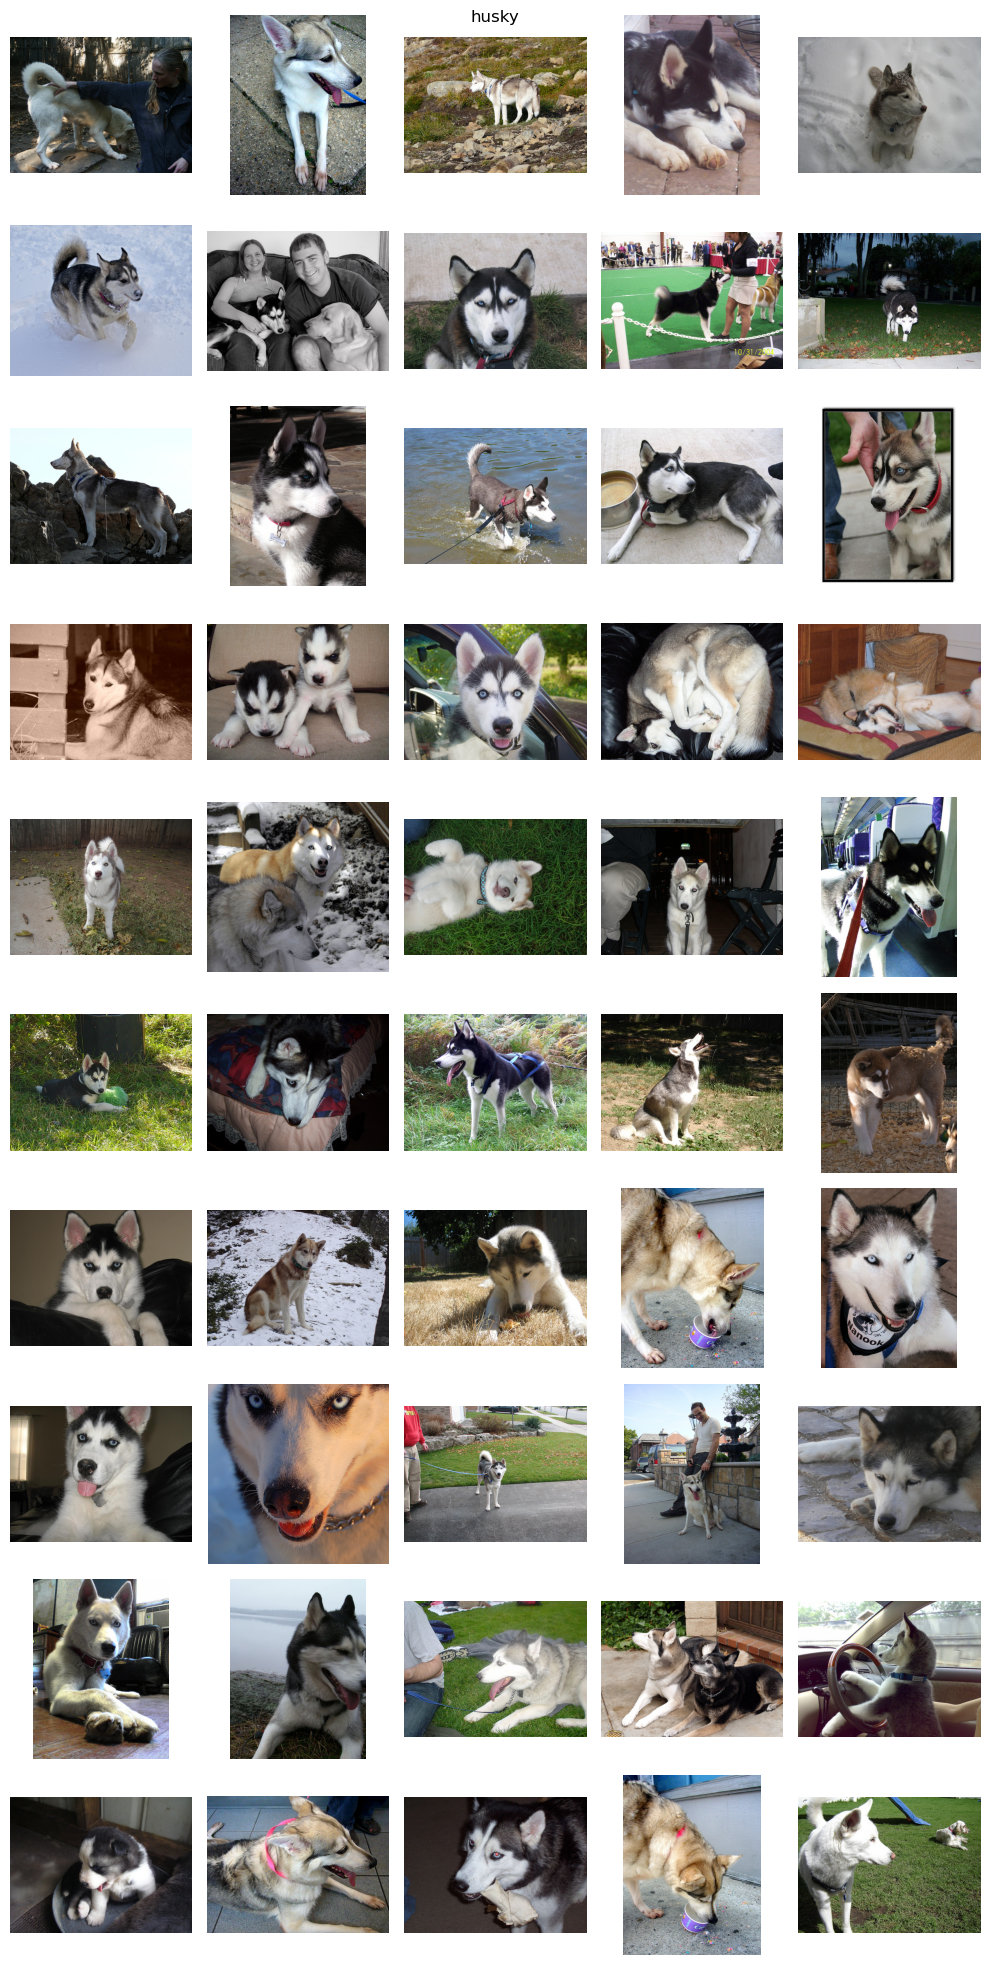

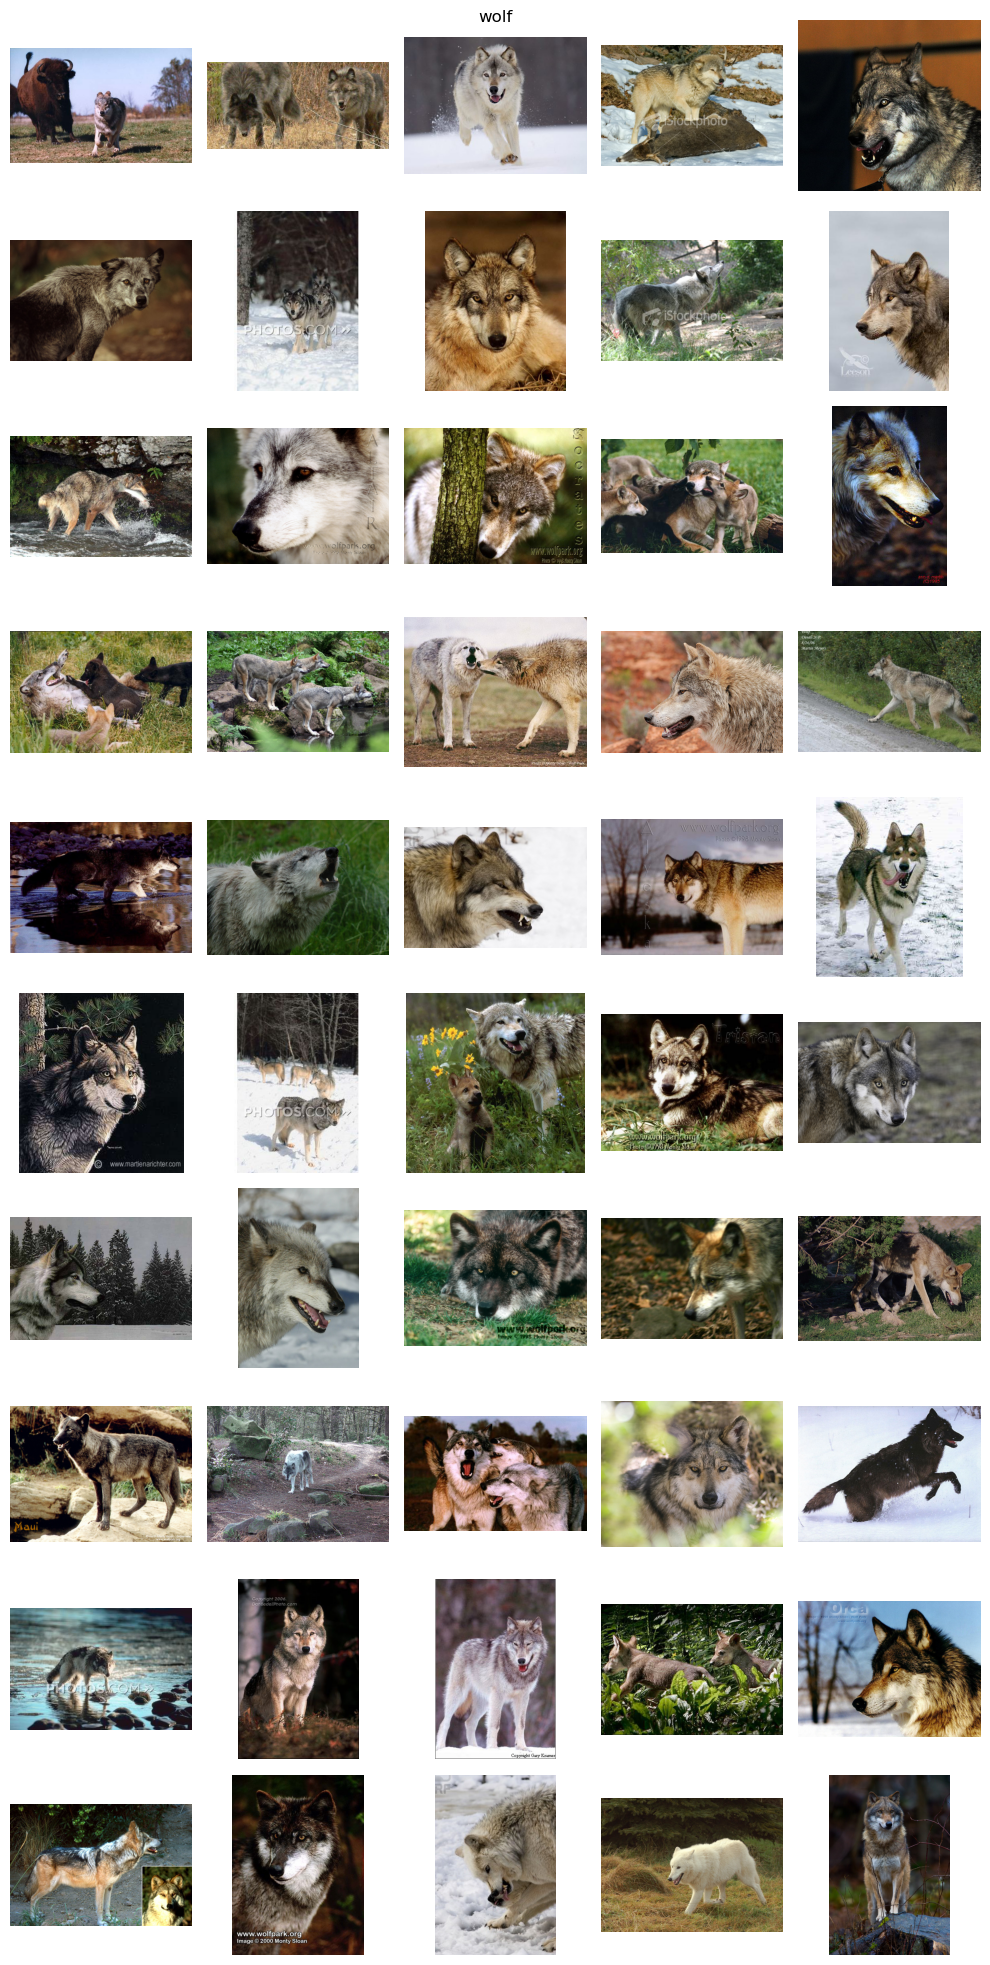

In [16]:
size = 2

for name in class_item_indices:
    fig, axs = plt.subplots(10, 5, figsize=(5 * size, 10 * size), tight_layout=True)
    axs = np.asarray(axs).ravel()
    fig.suptitle(name)
    for idx, ax in zip(class_item_indices[name], axs):
        img = np.array(Image.open(f"{val_img_dir}/{files[idx]}"))
        ax.imshow(img)
        ax.set_axis_off()